# Re-apertura del sector restaurantero

### Definición de módulos a utilizar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
LABELS = [0,1,2,3,4,5,6]

In [12]:
dataframe = pd.read_csv(r"data/Indicadores_INEGI_covid19.csv", encoding = 'ISO-8859-1')
dataframe.tail(10)

,imun,ent,nom_ent,mun,nom_mun,pobtot,pob_m,pob_f,pob60,pob60_m,...,tot_po_h,tot_p_h_e_a,tot_p_h_e_p,tot_p_h_n_e_a,tot_p_h_n_e_p,tot_po_m,tot_p_m_e_a,tot_p_m_e_p,tot_p_m_n_e_a,tot_p_m_n_e_p
2486,32049,32,Zacatecas,49.0,Valparaíso,32606.0,16032.0,16574.0,5825.0,2877.0,...,4172,2189,52.47,1982.7924,47.53,4306,2185,50.76,2120,49.24
2487,32050,32,Zacatecas,50.0,Vetagrande,9796.0,4833.0,4963.0,804.0,387.0,...,919,151,16.43,768.0000,83.57,312,145,46.47,167,53.53
2488,32051,32,Zacatecas,51.0,Villa de Cos,35252.0,17650.0,17602.0,4037.0,2094.0,...,3399,1790,52.67,1608.6257,47.33,3478,1897,54.54,1581,45.46
2489,32052,32,Zacatecas,52.0,Villa García,18745.0,9231.0,9514.0,1819.0,916.0,...,821,459,55.91,362.0000,44.09,872,526,60.32,346,39.68
2490,32053,32,Zacatecas,53.0,Villa González Ortega,13099.0,6376.0,6723.0,1480.0,703.0,...,790,439,55.57,351.0000,44.43,822,481,58.52,341,41.48
2491,32054,32,Zacatecas,54.0,Villa Hidalgo,19155.0,9433.0,9722.0,1903.0,945.0,...,635,379,59.69,256.0000,40.31,541,311,57.49,230,42.51
2492,32055,32,Zacatecas,55.0,Villanueva,30240.0,14793.0,15447.0,4741.0,2304.0,...,4400,2408,54.73,1991.6684,45.27,3919,2535,64.68,1384,35.32
2493,32056,32,Zacatecas,56.0,Zacatecas,146147.0,70855.0,75292.0,14332.0,6442.0,...,45538,22570,49.56,22968.3030,50.44,37373,19080,51.05,18294,48.95
2494,32057,32,Zacatecas,57.0,Trancoso,19413.0,9505.0,9908.0,1429.0,668.0,...,923,469,50.81,454.0000,49.19,1005,542,53.93,463,46.07
2495,32058,32,Zacatecas,58.0,Santa María de la Paz *,2656.0,1305.0,1351.0,503.0,248.0,...,270,173,64.07,97.0000,35.93,250,173,69.20,77,30.80


In [13]:
dataframe.shape

(2496, 148)

In [14]:
mask = (dataframe.mun != 0)
dataframe = dataframe.loc[mask]
dataframe.shape

(2464, 148)

In [16]:
dataframe = dataframe[dataframe['mun'].notna()]
dataframe.shape

(2463, 148)

In [23]:
dataframe = dataframe[['imun','ent','mun','pobtot','pea','ocupada','tra_omun','tot_est','est_e_a','est_n_e_a','tot_p_o','po_e_a','po_n_e_a']]

In [28]:
dataframe = dataframe.fillna(0)

### Visualizar las dimensiones

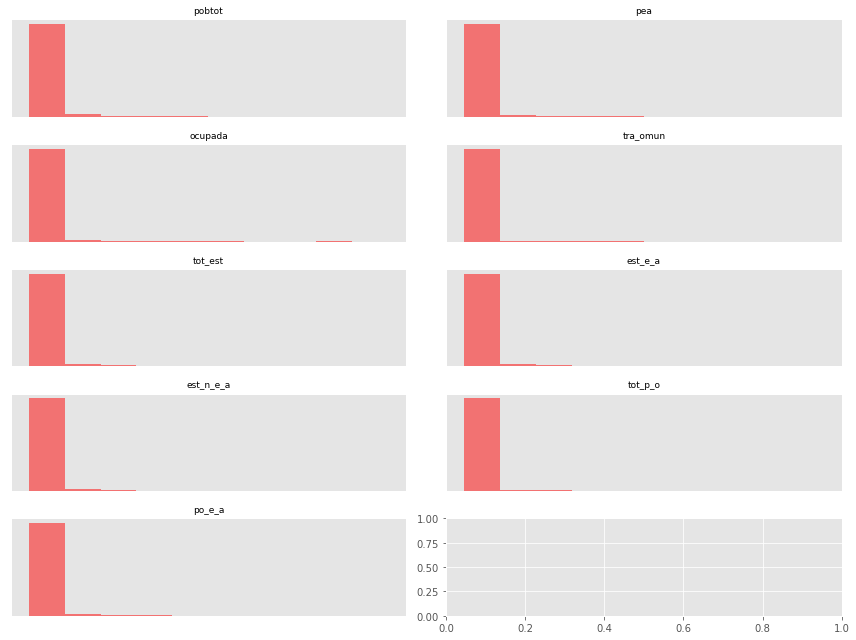

In [64]:
fig,axes =plt.subplots(5,2, figsize=(12, 9)) # 2 columnas cada una con 5 figuras, total 10 features

df = dataframe.drop(['imun', 'ent','mun'], axis=1)
ax=axes.ravel()
for i in range(len(df.columns)-1):
  _,bins=np.histogram(df[df.columns[i]],bins=10)
  ax[i].hist(df.values[:,i],color='r',alpha=.5)
  ax[i].set_title(df.columns[i],fontsize=9)
  ax[i].axes.get_xaxis().set_visible(False)
  ax[i].set_yticks(())
plt.tight_layout()
plt.show()

## Vamos a Normalizar ó Estandalizar los datos

In [30]:
scaler=StandardScaler()#instantiate
df = dataframe.drop(['imun', 'ent','mun'], axis=1)
scaler.fit(df) # calcula la media y estandar para cada dimension
X_scaled=scaler.transform(df)# transforma los datos a su nueva escala

In [31]:
X_scaled

array([[ 5.96660941e+00,  5.96033788e+00,  5.96303485e+00, ...,
         5.76056116e+00,  5.48254061e+00,  5.86981914e+00],
       [-1.48798363e-02, -8.47031688e-02, -8.87403036e-02, ...,
        -1.65811244e-01, -1.85393252e-01, -1.44091040e-01],
       [ 5.41279869e-02,  1.67209431e-02,  1.78769417e-02, ...,
         9.95019687e-03,  1.47087083e-02,  5.38301198e-03],
       ...,
       [ 7.02869208e-01,  6.85611731e-01,  6.83432193e-01, ...,
         1.23156321e+00,  1.29757671e+00,  1.14183784e+00],
       [-2.09655569e-01, -2.13840579e-01, -2.15181800e-01, ...,
        -2.23990995e-01, -2.23265551e-01, -2.19148536e-01],
       [-3.30311255e-01, -3.01227659e-01, -3.01582066e-01, ...,
        -2.49297479e-01, -2.48151993e-01, -2.44212679e-01]])

In [40]:
pca=PCA(n_components=10)
#pca=PCA(.85)
pca.fit(X_scaled) # buscar los componentes principales
X_pca=pca.transform(X_scaled) 
#revisemos la forma del array
print("shape of X_pca", X_pca.shape)

shape of X_pca (2463, 10)


In [41]:
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
#con 5 componentes tenemos algo mas del 85% de varianza explicada

[8.80778785e-01 6.49113521e-02 3.55311701e-02 1.39712168e-02
 3.28201479e-03 1.28253973e-03 2.40036682e-04 2.88471045e-06
 7.89368907e-11 1.16940665e-12]
suma: 0.9984745387954305


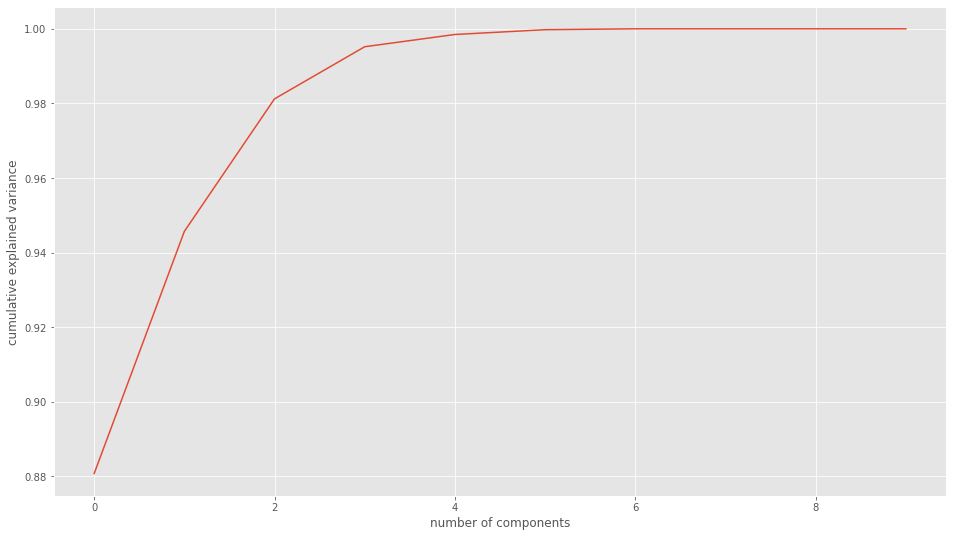

In [42]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

No handles with labels found to put in legend.


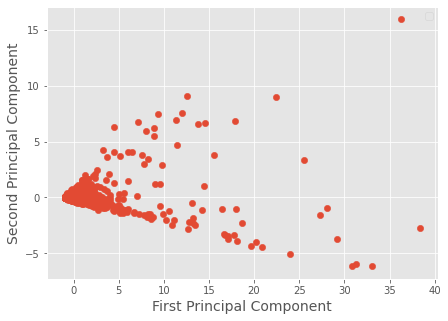

In [35]:
Xax=X_pca[:,0]
Yax=X_pca[:,1]
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')

ax.scatter(Xax,Yax,s=40)

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

C:\Users\BALAMLAPTOP2\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


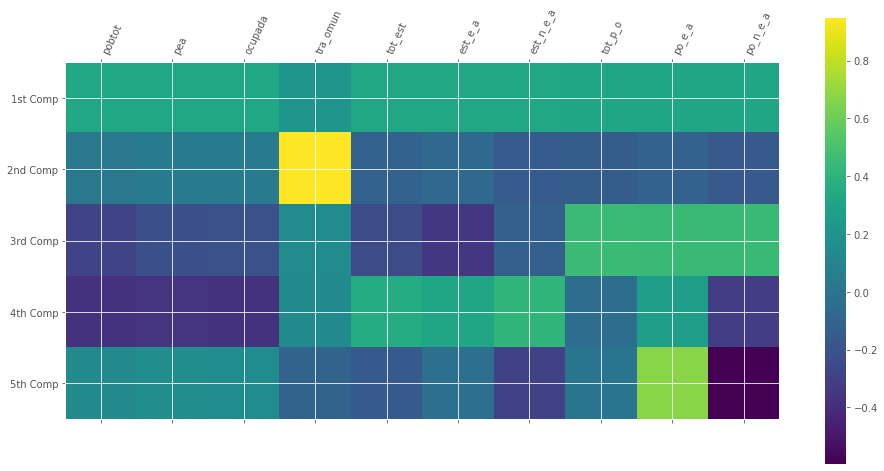

In [36]:
plt.matshow(pca.components_[0:5],cmap='viridis')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(df.columns)),df.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

In [43]:
components = pd.DataFrame(pca.components_, columns = df.columns)
components.shape

(10, 10)

In [44]:
X_pca.shape

(2463, 10)

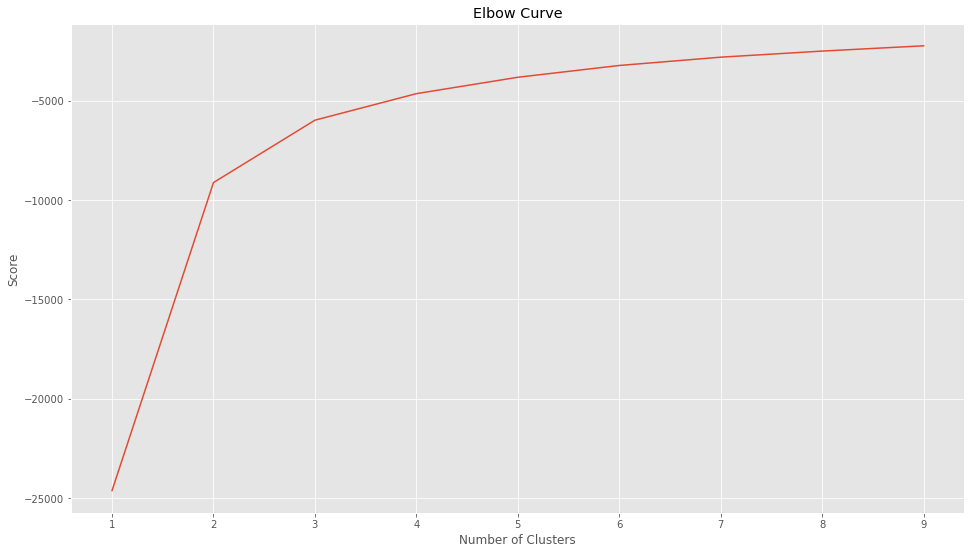

In [45]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_pca).score(X_pca) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [46]:
# Para el ejercicio, elijo 5 como un buen valor de K. Pero podría ser otro.
kmeans = KMeans(n_clusters=3).fit(X_pca)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 7.48890548e+00  8.46845363e-01 -4.09253214e-01 -9.08736542e-02
   6.30540673e-02 -4.51197747e-02 -2.51175998e-02 -3.37031157e-03
  -2.37131392e-06  1.14191456e-06]
 [-5.05535692e-01 -1.62611855e-02  5.10176922e-03  5.11276882e-03
  -2.76215902e-03  1.41049950e-03  1.41450729e-04  7.34729844e-05
  -2.69143800e-10 -3.39985000e-08]
 [ 2.30780736e+01 -1.24519867e+00  8.61559811e-01 -1.83761748e-01
   5.34885250e-02  1.50673884e-02  6.90554107e-02  4.13052788e-03
   7.80327377e-06 -5.41461128e-07]]


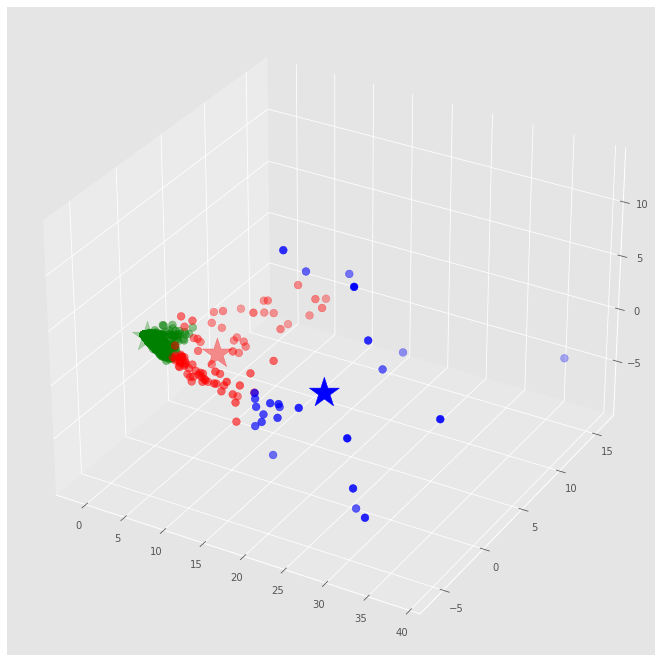

In [47]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X_pca)
# Obtenemos los centroids
C = kmeans.cluster_centers_
#colores=['red','green','blue','cyan','yellow','black','white']
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [48]:
# contamos cuantos usuarios hay en cada grupo
copy =  pd.DataFrame()
copy['imun']=dataframe['imun'].values
copy['ent']=dataframe['ent'].values
copy['mun']=dataframe['mun'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,82
1,green,2356
2,blue,25


In [50]:
copy.head()

,imun,ent,mun,label
0,1001,1,1.0,2
1,1002,1,2.0,1
2,1003,1,3.0,1
3,1004,1,4.0,1
4,1005,1,5.0,1


In [51]:
# creating a list of column names 
column_values = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10'] 
  
# creating the dataframe 
df_pca = pd.DataFrame(data = X_pca,    
                  columns = column_values) 

In [52]:
df_pca['imun']=dataframe['imun'].values
df_pca['ent']=dataframe['ent'].values
df_pca['mun']=dataframe['mun'].values
df_pca['label'] = labels;
df_pca

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,imun,ent,mun,label
0,17.773703,-3.319098,-0.868108,-0.028821,-0.226958,0.301368,0.025632,0.003199,1.203080e-04,8.579576e-07,1001,1,1.0,2
1,-0.427773,0.200775,-0.011007,-0.167529,0.029573,0.033467,-0.061407,0.000101,8.815602e-07,-2.674004e-08,1002,1,2.0,1
2,0.101535,-0.223959,-0.113859,0.058590,-0.011129,-0.000634,-0.022159,-0.002064,1.196861e-04,-1.358975e-05,1003,1,3.0,1
3,-0.640771,0.034698,0.073676,0.030059,0.036667,-0.015034,0.000342,0.000288,1.196137e-04,1.032327e-06,1004,1,4.0,1
4,2.193898,0.831052,0.610614,0.000943,-0.433298,-0.151194,-0.015713,-0.007389,1.463618e-06,-1.469483e-05,1005,1,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,-0.797292,-0.009015,0.034030,-0.092515,0.038802,0.021009,-0.024159,-0.000722,5.637380e-07,5.935933e-08,32054,32,54.0,1
2459,-0.149198,-0.150977,-0.169894,0.327791,-0.081944,-0.098328,-0.013539,0.003890,1.193468e-04,8.541190e-07,32055,32,55.0,1
2460,2.919232,-0.605971,0.461108,0.356659,-0.002016,-0.117143,-0.033297,0.001519,3.362358e-07,-2.208355e-08,32056,32,56.0,1
2461,-0.697025,0.139866,0.039138,-0.051987,0.015313,0.002409,-0.006357,0.000650,5.904185e-07,3.260557e-08,32057,32,57.0,1


In [61]:
mask = (df_pca.label == 2)
df_pca.loc[mask]

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,imun,ent,mun,label
0,17.773703,-3.319098,-0.868108,-0.028821,-0.226958,0.301368,0.025632,0.003199,1.203080e-04,8.579576e-07,1001,1,1.0,2
12,17.060223,-3.483563,-0.214635,-2.706176,1.016209,0.296092,-0.046872,0.011359,4.237114e-06,6.060470e-07,2002,2,2.0,2
14,30.828083,-6.105965,1.938093,-5.701783,0.657320,0.346856,0.216252,0.002168,-1.111106e-04,-1.407250e-05,2004,2,4.0,2
221,17.145297,-3.703557,1.235893,-2.250508,-0.205659,0.306727,0.044781,-0.002041,3.581656e-06,4.581325e-07,8019,8,19.0,2
239,23.920498,-5.019201,2.326483,-6.955733,-0.945398,-0.284341,-0.190278,-0.000665,1.059489e-05,4.352420e-07,8037,8,37.0,2
273,22.441897,9.037087,-2.527482,0.569318,0.166851,0.387473,0.132715,0.014390,6.526196e-06,-1.163883e-06,9005,9,5.0,2
275,36.214842,15.952024,-4.746891,1.342838,-0.049391,-0.565351,0.367144,0.055650,1.097734e-05,-2.552366e-06,9007,9,7.0,2
278,17.841446,6.848651,5.308952,-0.982631,1.824843,-0.406256,0.121000,-0.031022,6.626995e-06,1.426679e-06,9010,9,10.0,2
282,15.588805,3.812100,7.015154,0.683668,-0.521004,-0.675403,0.298204,0.014426,3.745449e-06,-5.510185e-08,9014,9,14.0,2
283,29.134578,-3.676755,13.309788,7.411748,1.338041,2.182749,-0.269691,0.040024,-6.388939e-06,-4.938117e-07,9015,9,15.0,2


In [54]:
y = df_pca['label']
X = df_pca.drop(['label','imun','ent','mun'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [55]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

In [56]:
def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    clf.fit(X_train, y_train)
    return clf

model = run_model_balanced(X_train, X_test, y_train, y_test)

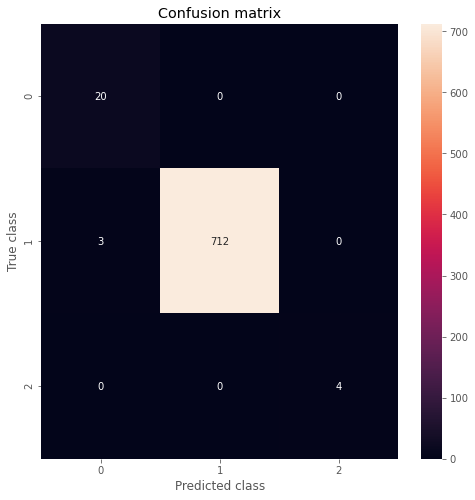

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        20
           1       1.00      1.00      1.00       715
           2       1.00      1.00      1.00         4

    accuracy                           1.00       739
   macro avg       0.96      1.00      0.98       739
weighted avg       1.00      1.00      1.00       739



In [57]:
LABELS = [0,1,2]
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

In [58]:
pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [59]:
from sklearn.ensemble import RandomForestClassifier
# otro modelo, variando hiperparámetros
model = RandomForestClassifier(n_estimators=100, class_weight="balanced",
                               max_features = 'sqrt', verbose=2, max_depth=6,
                               oob_score=True, random_state=50)
# a entrenar
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestClassifier(class_weight='balanced', max_depth=6,
                       max_features='sqrt', oob_score=True, random_state=50,
                       verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


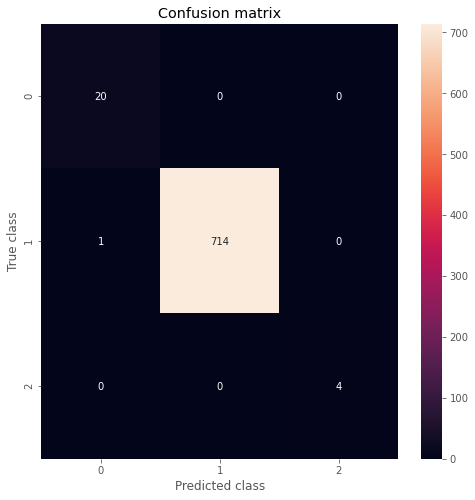

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      1.00      1.00       715
           2       1.00      1.00      1.00         4

    accuracy                           1.00       739
   macro avg       0.98      1.00      0.99       739
weighted avg       1.00      1.00      1.00       739



In [60]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)